**IMAGE** **CLASSIFICATION**

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-07-11 10:24:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   176MB/s    in 0.4s    

2020-07-11 10:24:32 (176 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile
local_zip="/tmp/cats_and_dogs_filtered.zip"## which zip file you want to extract
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
os.listdir("/tmp/cats_and_dogs_filtered")

['train', 'vectorize.py', 'validation']

In [4]:
os.listdir("/tmp/cats_and_dogs_filtered/train")

['dogs', 'cats']

In [5]:
len(os.listdir("/tmp/cats_and_dogs_filtered/train/dogs"))

1000

In [6]:
len(os.listdir("/tmp/cats_and_dogs_filtered/train/cats"))

1000

In [7]:
base_dir="/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
## Directory with training cat pictures
train_cat_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cat_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [8]:
## File names
train_cat_filenames=os.listdir(train_cat_dir)
train_cat_filenames[:4]

['cat.955.jpg', 'cat.776.jpg', 'cat.914.jpg', 'cat.467.jpg']

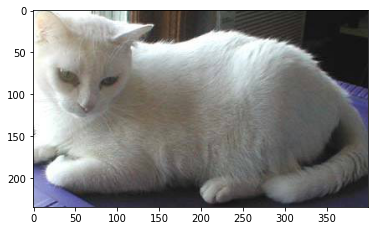

In [9]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_cat_dir+'/cat.955.jpg'))

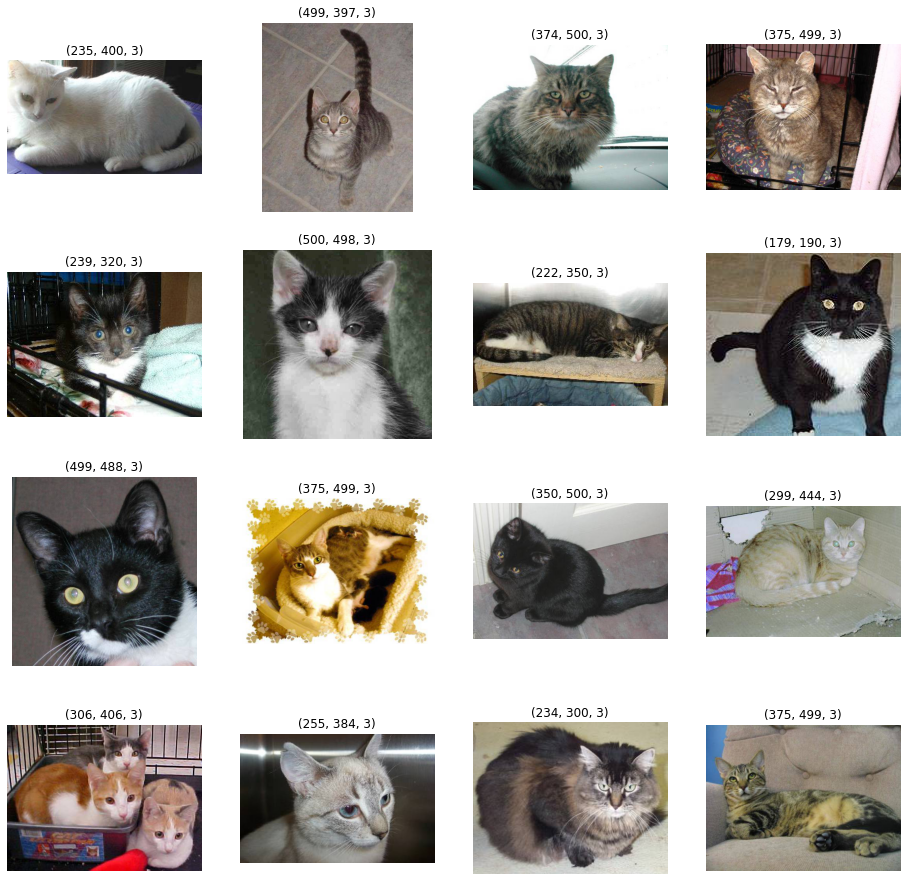

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j=1 ##plot position
for i in range(16):
  img=plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')
  j+=1

**Data** **Preprocessing**

Read the image data

We have different shapes here.

We need same shape for each and every image

reshaing the images

cats and dogs labelling

**Creating** **Train** **and** **validation** **data** **from** **Folder**

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
train_generator

(20, 150, 150, 3)
(20,)


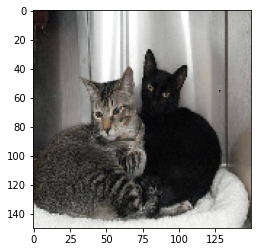

In [13]:
imgs,labels = train_generator.next()
#print(i)
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])

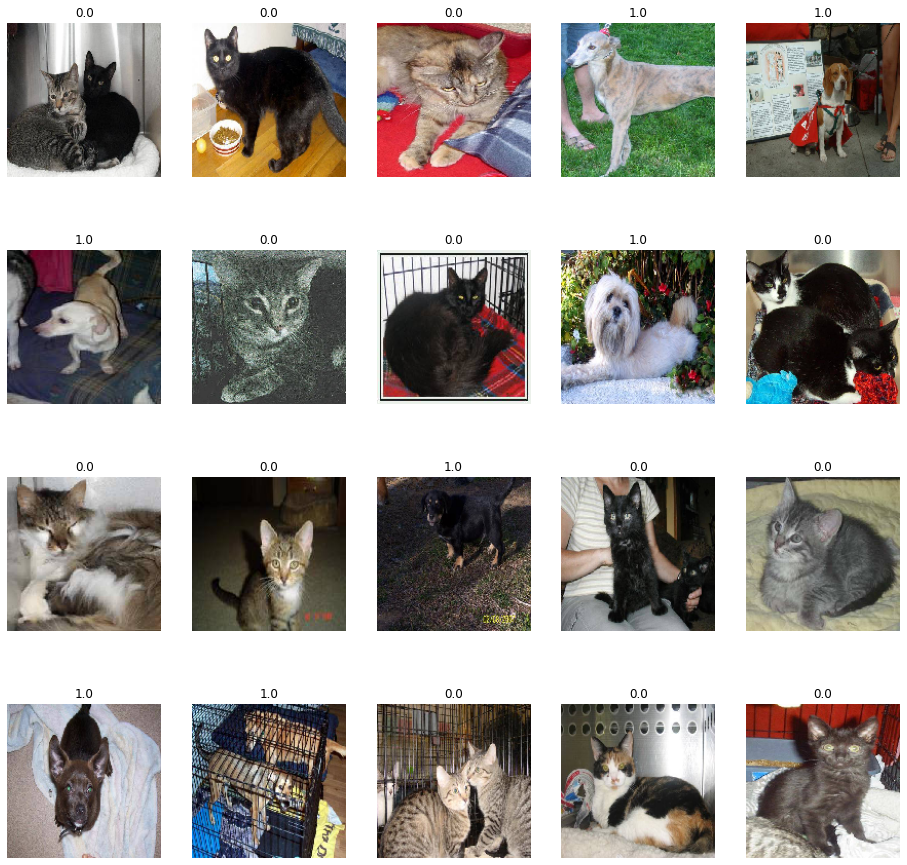

In [14]:
plt.figure(figsize=(16,16))
pos=1 ##plot position
for i in range(20):
  
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:])
  plt.title(labels[i])
  plt.axis('off')
  pos+=1

In [15]:
## import required methods
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [16]:
model = Sequential()
## add a conv layer followed by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
# Convert the featuremap into 1D  array
model.add(Flatten())
# Fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
## Final output layer
model.add(Dense(1,activation='sigmoid'))

#let us see the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [17]:
### Compiling the model
import tensorflow as tf

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

**train** **the** **model**

In [18]:
history=model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)

Epoch 1/15
100/100 [==============================] - 58s 577ms/step - loss: 0.7565 - accuracy: 0.5550 - val_loss: 0.8236 - val_accuracy: 0.5070
Epoch 2/15
100/100 [==============================] - 57s 574ms/step - loss: 0.6571 - accuracy: 0.6450 - val_loss: 0.6323 - val_accuracy: 0.6260
Epoch 3/15
100/100 [==============================] - 57s 572ms/step - loss: 0.5535 - accuracy: 0.7215 - val_loss: 0.5688 - val_accuracy: 0.7100
Epoch 4/15
100/100 [==============================] - 57s 574ms/step - loss: 0.4640 - accuracy: 0.7855 - val_loss: 0.6326 - val_accuracy: 0.6850
Epoch 5/15
100/100 [==============================] - 57s 574ms/step - loss: 0.3991 - accuracy: 0.8175 - val_loss: 0.6806 - val_accuracy: 0.6870
Epoch 6/15
100/100 [==============================] - 58s 579ms/step - loss: 0.2903 - accuracy: 0.8800 - val_loss: 1.4061 - val_accuracy: 0.5940
Epoch 7/15
100/100 [==============================] - 57s 574ms/step - loss: 0.2154 - accuracy: 0.9105 - val_loss: 0.7912 - val_ac

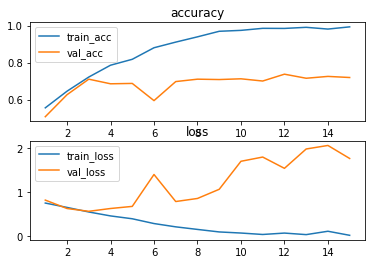

In [19]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,16))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()

**To** **predict** **for** **an** **image**

Read the image

check the shape

Resize into required shape(150 150 3)

Apply scaling

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/tmp/scooby.jpg')
print(type(img))
img=tf.keras.preprocessing.image.img_to_array(img)
#Scaling
img=img/255
print(img.shape)
print(type(img))

FileNotFoundError: ignored

In [ ]:
img=tf.image.resize(img,(150,150))
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)

In [ ]:
model.predict(img)

In [ ]:
img = image.load_img('/tmp/garfield.jpg')
print(type(img))
img=tf.keras.preprocessing.image.img_to_array(img)
#Scaling
img=img/255
print(img.shape)
print(type(img))

In [ ]:
img=tf.image.resize(img,(150,150))
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)

In [ ]:
model.predict(img)

In [21]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/sumathi16/Datasets/master/balance_data.csv")
data.head()

,Unnamed: 0,balance,var1,var2,var3,var4
0,0,1,1,1,1,1
1,1,0,1,1,1,2
2,2,0,1,1,1,3
3,3,0,1,1,1,4
4,4,0,1,1,1,5


In [22]:
data.balance.value_counts()

0    576
1     49
Name: balance, dtype: int64

In [23]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X,y=smk.fit_sample(data[['var1','var2','var3','var4']],data['balance'])

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [24]:
print(X.shape)

(1152, 4)


In [26]:
y.value_counts()